<a href="https://colab.research.google.com/github/f07735t37/python-and-ML-course/blob/main/Python_course_session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Weather conditions in WWII

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #importing a Machine Learning model

In [2]:
weather_data = pd.read_csv("Summary of Weather.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
weather_data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [7]:
weather_data["MaxTemp"]

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [8]:
weather_data["MinTemp"]

0         22.222222
1         21.666667
2         22.222222
3         22.222222
4         21.666667
            ...    
119035    18.333333
119036    18.333333
119037    18.333333
119038    18.333333
119039    17.222222
Name: MinTemp, Length: 119040, dtype: float64

Creating the initial table

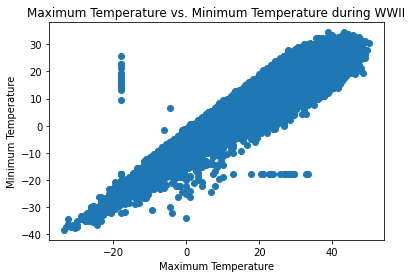

In [9]:
plt.scatter(weather_data["MaxTemp"], weather_data["MinTemp"])
plt.title("Maximum Temperature vs. Minimum Temperature during WWII")
plt.xlabel("Maximum Temperature")
plt.ylabel("Minimum Temperature")
plt.show()

In [11]:
x = weather_data["MaxTemp"].values.reshape(-1, 1) #x is the feature variable. This is known data that we're using for the prediction. reshape() will 'reshape' the data
y = weather_data["MinTemp"].values.reshape(-1, 1) #y is the target variable. This is what we're trying to predict
#for our purposes we're reshaping the data into a single column array

In [14]:
x # MaxTemp values as a single column array

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [15]:
y # MinTemp values as a single column array

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y) #split data into training and testing with an 80% 20% split. 80/20 is automatic unless you specify another value

In [19]:
ml_model = LinearRegression().fit(x_train, y_train) 

In [22]:
print("Training set score: ", ml_model.score(x_train, y_train)) #ML model (machine learning model) prediction based on training set

Training set score:  0.7740303103852098


In [23]:
print("Training set score: ", ml_model.score(x_train, y_train)*100, "%") #ML model (machine learning model) prediction (generalisation) based on training set as a percentage

Training set score:  77.40303103852098 %


In [26]:
print("Test set score: ", ml_model.score(x_test, y_test)*100, "%") #ML model prediction score based on the test set. Scoring close to the training percentage shows it's generalising well. Good!

Test set score:  76.39379434092507 %


In [30]:
y_prediction = ml_model.predict(x_test) # predict the MinTemp values for the test set based on the x_test data provided and store a variable

In [31]:
y_prediction  # ML model's predictions for the test set MinTemp

array([[18.87919996],
       [26.35091749],
       [16.07730588],
       ...,
       [21.21411169],
       [24.48298811],
       [17.47825292]])

In [32]:
y_test # actual test set MinTemp to compare to values above

array([[16.66666667],
       [18.33333333],
       [15.        ],
       ...,
       [15.55555556],
       [15.55555556],
       [23.88888889]])

# Plotting results of the Linear Regression Model

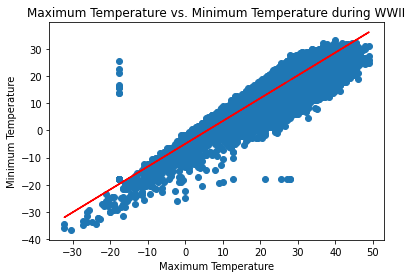

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, color="r") #red line is the predicting Line of Best Fit
plt.title("Maximum Temperature vs. Minimum Temperature during WWII")
plt.xlabel("Maximum Temperature")
plt.ylabel("Minimum Temperature")
plt.show()